In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
import keras

Using TensorFlow backend.


In [2]:
from keras.applications.mobilenet import MobileNet
mobile_base_model = keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3), alpha=1.0, depth_multiplier=1, dropout=0.1, include_top=False, weights='imagenet', input_tensor=None, pooling=None)

In [3]:
from keras.layers import Activation, Reshape
conv_trans1 = keras.layers.Conv2DTranspose(512, 8, strides=(1, 1), padding='valid', \
                             data_format=None, activation=None, use_bias=True, kernel_initializer='random_uniform', \
                             bias_initializer='ones', kernel_regularizer=None, bias_regularizer=None, \
                             activity_regularizer=None, kernel_constraint=None, bias_constraint=None)\
                            (mobile_base_model.output)
conv_trans2 = keras.layers.Conv2DTranspose(256, 15, strides=(1, 1), padding='valid', \
                             data_format=None, activation=None, use_bias=True, kernel_initializer='random_uniform', \
                             bias_initializer='ones', kernel_regularizer=None, bias_regularizer=None, \
                             activity_regularizer=None, kernel_constraint=None, bias_constraint=None)\
                            (conv_trans1)
conv_trans3 = keras.layers.Conv2DTranspose(128, 29, strides=(1, 1), padding='valid', \
                             data_format=None, activation=None, use_bias=True, kernel_initializer='random_uniform', \
                             bias_initializer='ones', kernel_regularizer=None, bias_regularizer=None, \
                             activity_regularizer=None, kernel_constraint=None, bias_constraint=None)\
                            (conv_trans2)
conv_trans4 = keras.layers.Conv2DTranspose(64, 57, strides=(1, 1), padding='valid', \
                             data_format=None, activation=None, use_bias=True, kernel_initializer='random_uniform', \
                             bias_initializer='ones', kernel_regularizer=None, bias_regularizer=None, \
                             activity_regularizer=None, kernel_constraint=None, bias_constraint=None)\
                            (conv_trans3)
conv_trans5 = keras.layers.Conv2DTranspose(2, 113, strides=(1, 1), padding='valid', \
                             data_format=None, activation=None, use_bias=True, kernel_initializer='random_uniform', \
                             bias_initializer='ones', kernel_regularizer=None, bias_regularizer=None, \
                             activity_regularizer=None, kernel_constraint=None, bias_constraint=None)\
                            (conv_trans4)

reshaped = Reshape((224 * 224, 2))(conv_trans5)
softmax = Activation('softmax')(reshaped)
mobile_head_model = Model(input = mobile_base_model.input, output = softmax)

mobile_head_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

/root/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  # Remove the CWD from sys.path while we load stuff.


In [4]:
import pickle
import numpy as np
y= []
d2 = {}
keys = []
with open('GrayTrainY.pkl', 'rb') as file:
    d2 = pickle.load(file)

for key in d2:
    keys.append(key)
    y.append(np.array(d2[key]).reshape(224 * 224 * 2))

In [5]:
y[0].reshape(224 * 224, 2)[:, 1]

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
x = []
d1 = {}
with open('TrainX.pkl', 'rb') as file:
    u = pickle._Unpickler(file)
    u.encoding = 'latin1'
    d1 = u.load()

for key in keys:
    fit_key = key.replace('.ppm', '.jpg')
    x.append(np.array(d1[fit_key]).reshape(224 * 224 * 3))

In [7]:
np.array(x).shape

(2927, 150528)

In [8]:
np.array(y).shape

(2927, 100352)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt


draw_callback = keras.callbacks.LambdaCallback(on_batch_begin=lambda batch,logs: {
    plt.imshow(mobile_head_model.predict(np.array(x[1]).reshape(-1, 224, 224, 3))[:, :, 1].reshape(224 * 224 * 1).reshape(224, 224), cmap='gray'),
    plt.show(),
    plt.imshow(y[1].reshape(224 * 224, 2)[:, 1].reshape(224, 224), cmap='gray'),
    plt.show()
})

Epoch 1/5


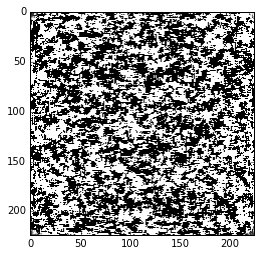

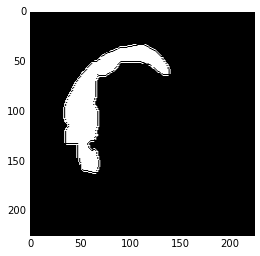

   3/2927 [..............................] - ETA: 15:55:45 - loss: 7.9530 - acc: 0.4998

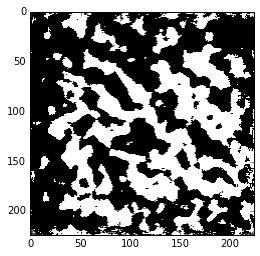

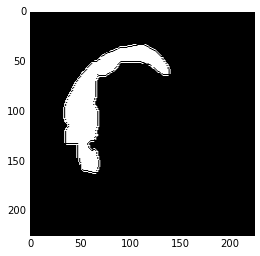

   6/2927 [..............................] - ETA: 13:54:09 - loss: 7.1888 - acc: 0.5487

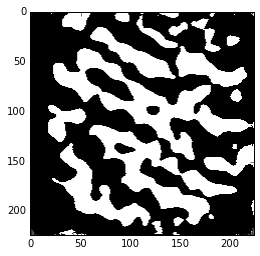

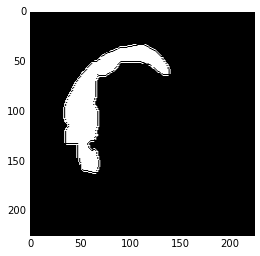

   9/2927 [..............................] - ETA: 13:12:11 - loss: 6.7897 - acc: 0.5749

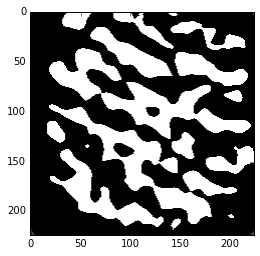

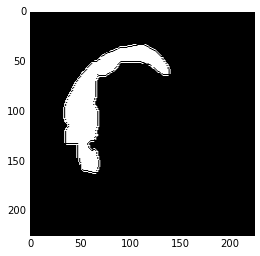

  12/2927 [..............................] - ETA: 12:51:07 - loss: 6.5211 - acc: 0.5925

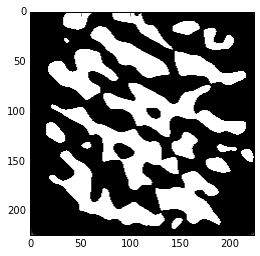

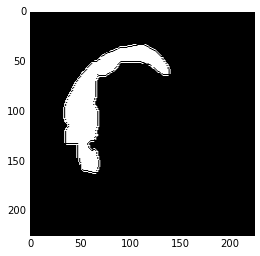

  15/2927 [..............................] - ETA: 12:38:21 - loss: 6.3128 - acc: 0.6059

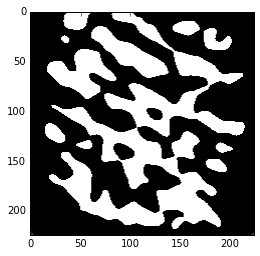

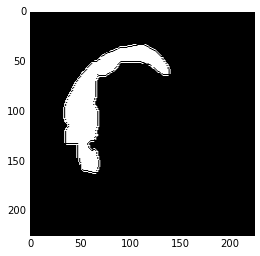

  18/2927 [..............................] - ETA: 12:31:14 - loss: 6.1789 - acc: 0.6146

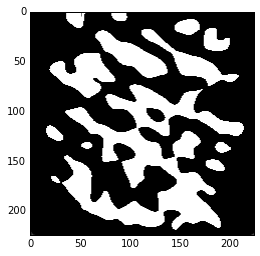

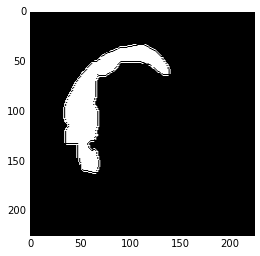

  21/2927 [..............................] - ETA: 12:24:24 - loss: 6.0359 - acc: 0.6238

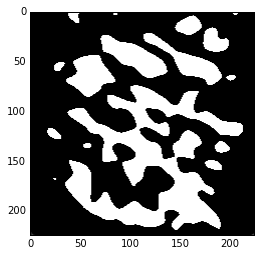

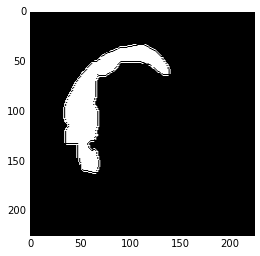

  24/2927 [..............................] - ETA: 12:19:34 - loss: 5.9072 - acc: 0.6320

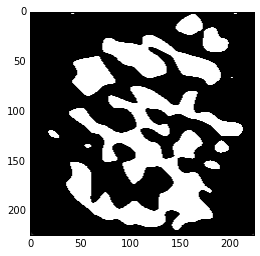

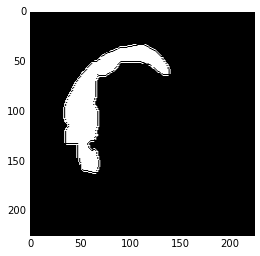

  27/2927 [..............................] - ETA: 12:16:07 - loss: 5.8318 - acc: 0.6368

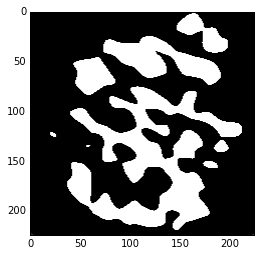

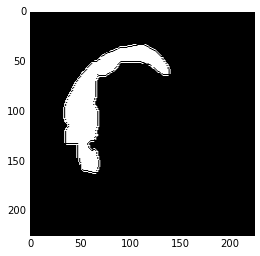

  30/2927 [..............................] - ETA: 12:12:29 - loss: 5.6935 - acc: 0.6456

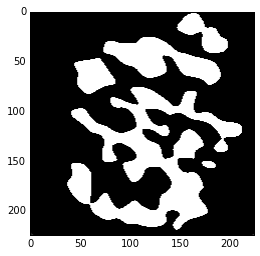

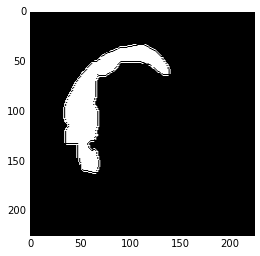

  33/2927 [..............................] - ETA: 12:09:33 - loss: 5.6076 - acc: 0.6510

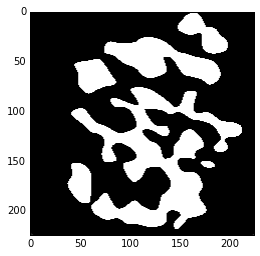

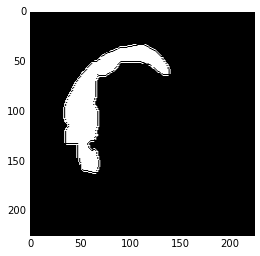

  36/2927 [..............................] - ETA: 12:07:15 - loss: 5.5256 - acc: 0.6562

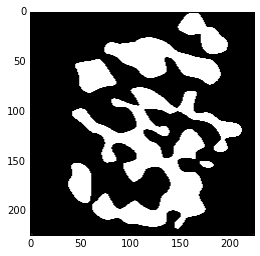

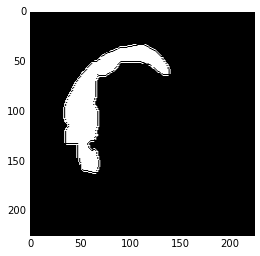

  39/2927 [..............................] - ETA: 12:04:42 - loss: 5.4379 - acc: 0.6617

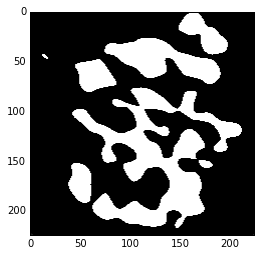

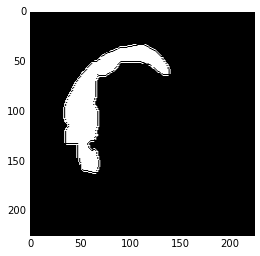

  42/2927 [..............................] - ETA: 12:02:26 - loss: 5.3603 - acc: 0.6666

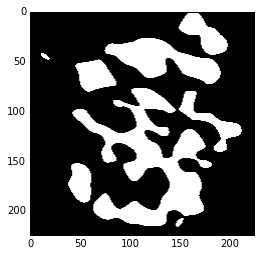

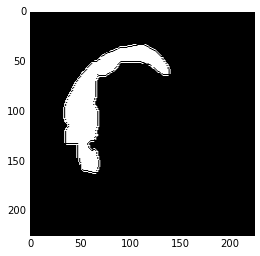

  45/2927 [..............................] - ETA: 12:00:22 - loss: 5.2754 - acc: 0.6719

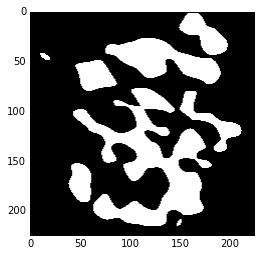

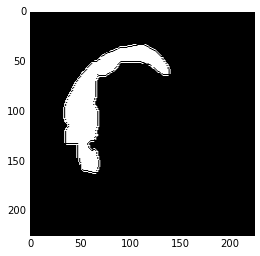

  48/2927 [..............................] - ETA: 11:58:38 - loss: 5.2505 - acc: 0.6735

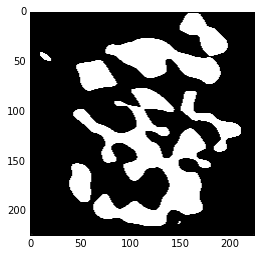

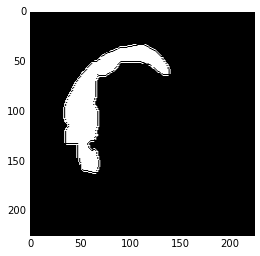

  51/2927 [..............................] - ETA: 11:57:02 - loss: 5.1980 - acc: 0.6768

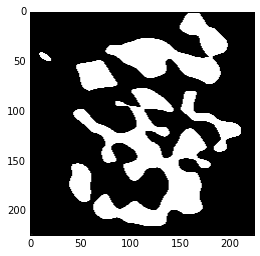

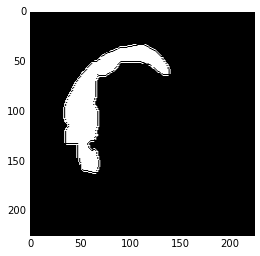

  54/2927 [..............................] - ETA: 11:55:33 - loss: 5.1813 - acc: 0.6779

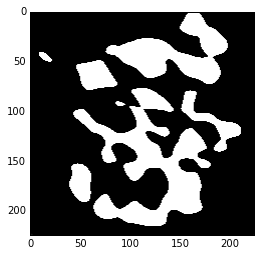

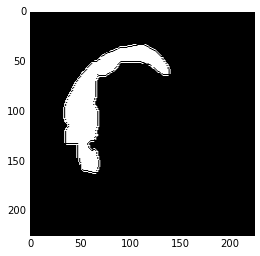

  57/2927 [..............................] - ETA: 11:54:10 - loss: 5.1233 - acc: 0.6815

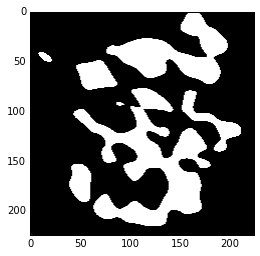

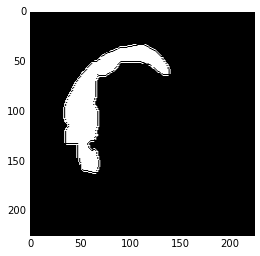

  60/2927 [..............................] - ETA: 11:52:51 - loss: 5.0913 - acc: 0.6835

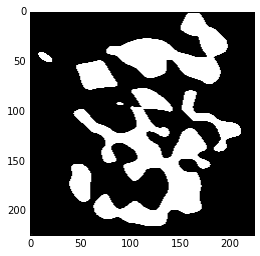

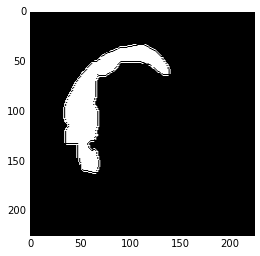

  63/2927 [..............................] - ETA: 11:51:34 - loss: 5.0900 - acc: 0.6836

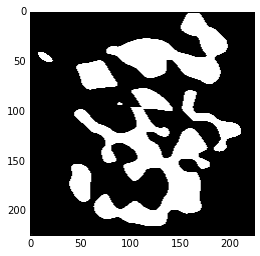

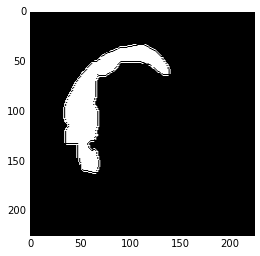

  66/2927 [..............................] - ETA: 11:50:23 - loss: 5.0534 - acc: 0.6859

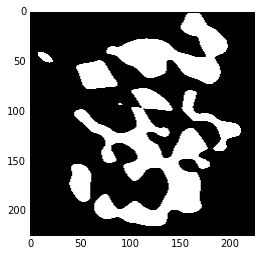

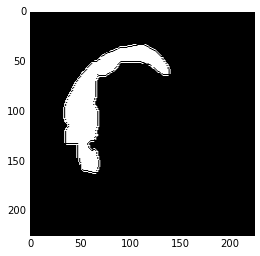

  69/2927 [..............................] - ETA: 11:49:15 - loss: 5.0738 - acc: 0.6847

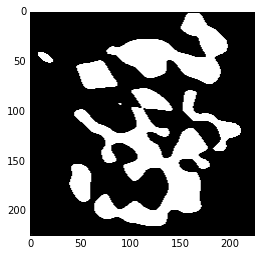

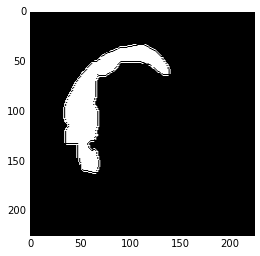

  72/2927 [..............................] - ETA: 11:48:02 - loss: 5.0565 - acc: 0.6858

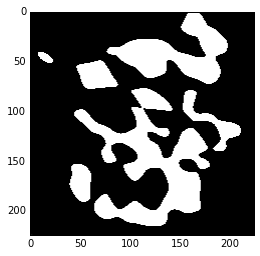

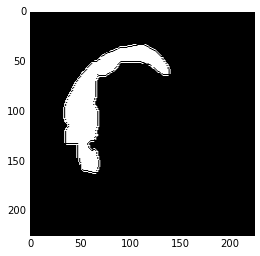

  75/2927 [..............................] - ETA: 11:46:54 - loss: 5.0332 - acc: 0.6872

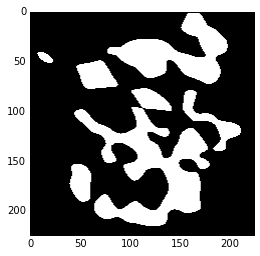

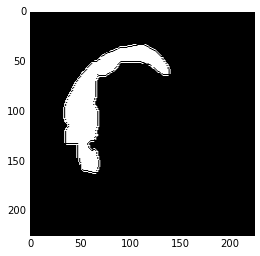

  78/2927 [..............................] - ETA: 11:45:46 - loss: 5.0105 - acc: 0.6887

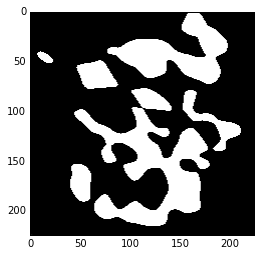

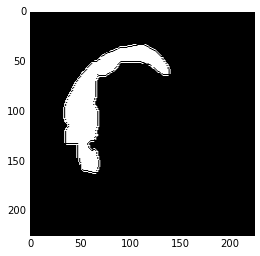

  81/2927 [..............................] - ETA: 11:44:43 - loss: 5.0022 - acc: 0.6892

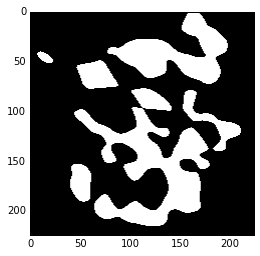

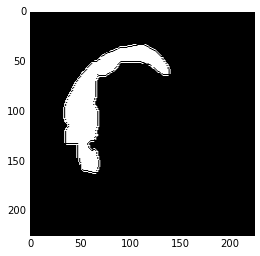

  84/2927 [..............................] - ETA: 11:43:37 - loss: 4.9713 - acc: 0.6911

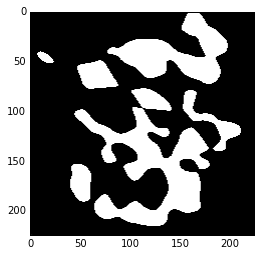

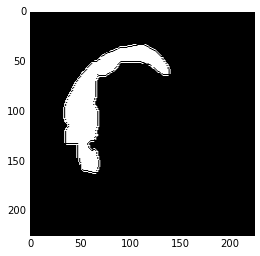

  87/2927 [..............................] - ETA: 11:42:34 - loss: 4.9376 - acc: 0.6932

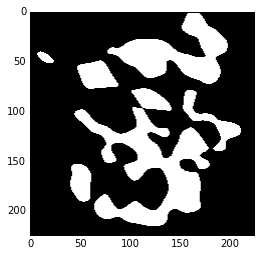

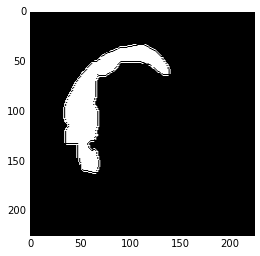

  90/2927 [..............................] - ETA: 11:41:31 - loss: 4.9111 - acc: 0.6949

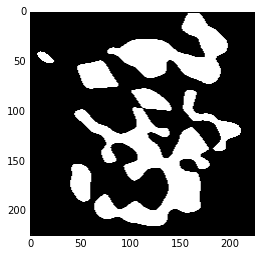

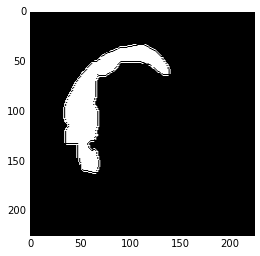

  93/2927 [..............................] - ETA: 11:40:25 - loss: 4.8902 - acc: 0.6962

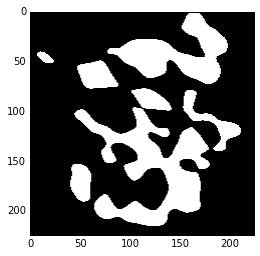

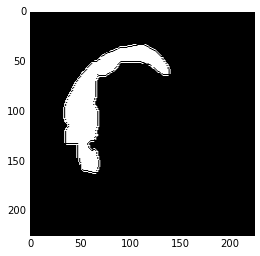

  96/2927 [..............................] - ETA: 11:39:23 - loss: 4.8676 - acc: 0.6976

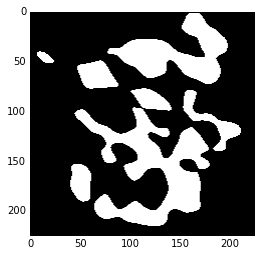

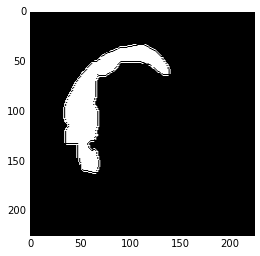

  99/2927 [>.............................] - ETA: 11:38:24 - loss: 4.8682 - acc: 0.6976

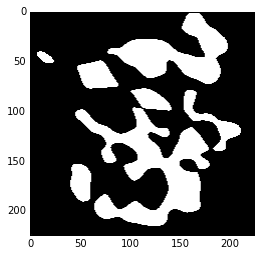

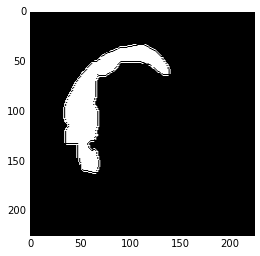

 102/2927 [>.............................] - ETA: 11:37:26 - loss: 4.8477 - acc: 0.6989

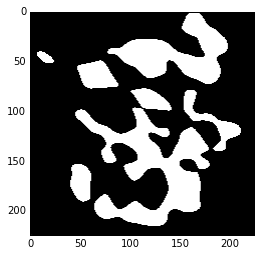

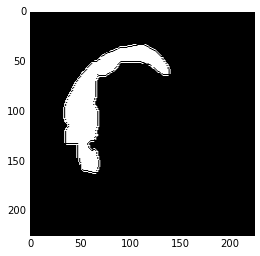

 105/2927 [>.............................] - ETA: 11:36:35 - loss: 4.8302 - acc: 0.7000

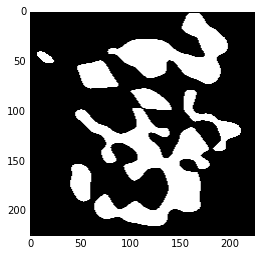

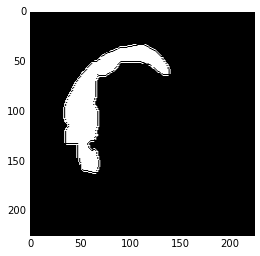

 108/2927 [>.............................] - ETA: 11:35:43 - loss: 4.8105 - acc: 0.7012

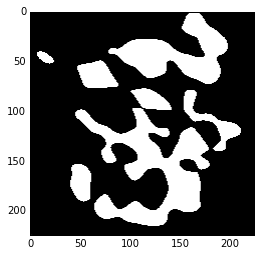

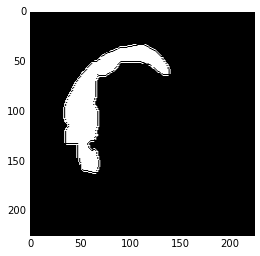

 111/2927 [>.............................] - ETA: 11:34:54 - loss: 4.7893 - acc: 0.7025

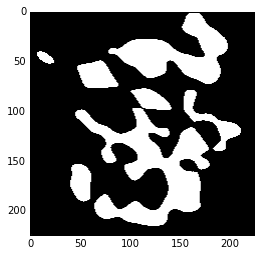

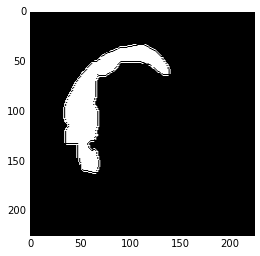

 114/2927 [>.............................] - ETA: 11:36:27 - loss: 4.7810 - acc: 0.7031

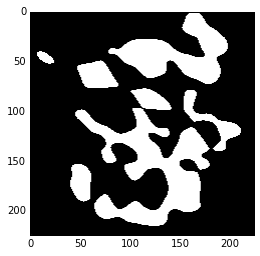

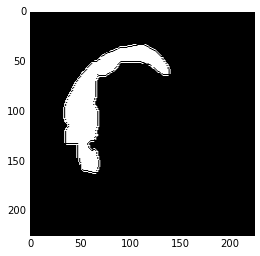

 117/2927 [>.............................] - ETA: 11:35:37 - loss: 4.7669 - acc: 0.7039

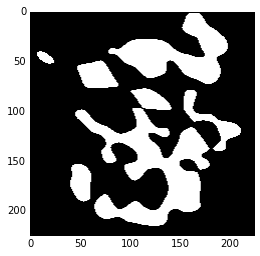

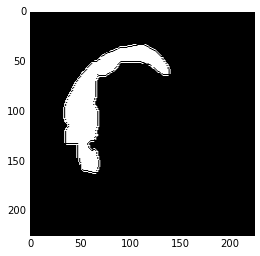

 120/2927 [>.............................] - ETA: 11:34:43 - loss: 4.7766 - acc: 0.7033

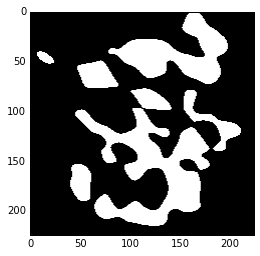

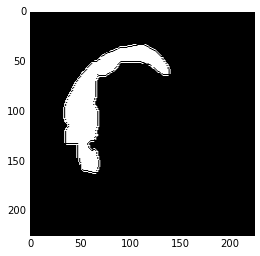

 123/2927 [>.............................] - ETA: 11:33:54 - loss: 4.7771 - acc: 0.7033

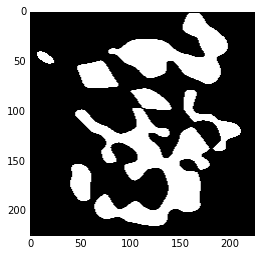

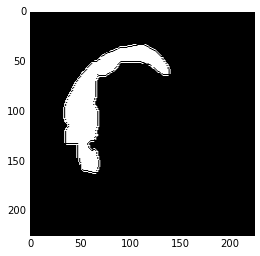

 126/2927 [>.............................] - ETA: 11:33:09 - loss: 4.7629 - acc: 0.7042

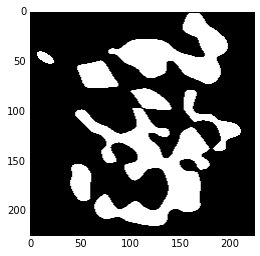

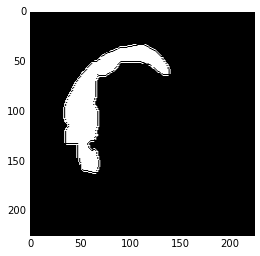

 129/2927 [>.............................] - ETA: 11:32:20 - loss: 4.7595 - acc: 0.7044

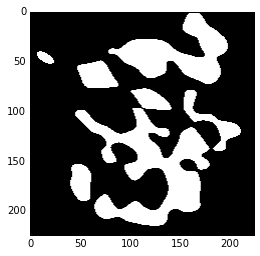

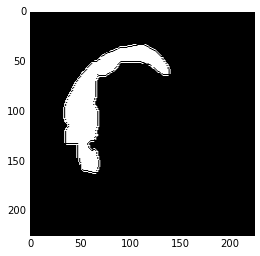

 132/2927 [>.............................] - ETA: 11:31:33 - loss: 4.7494 - acc: 0.7051

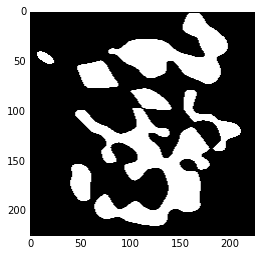

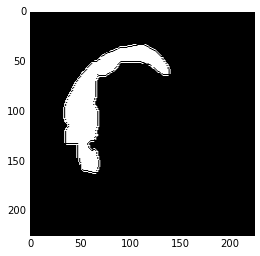

 135/2927 [>.............................] - ETA: 11:30:41 - loss: 4.7403 - acc: 0.7056

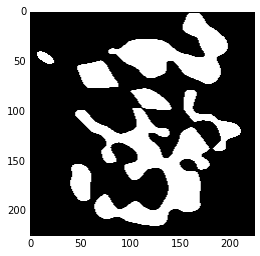

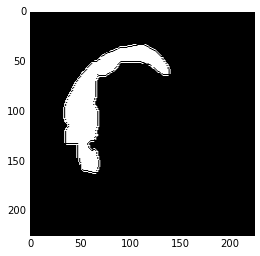

 138/2927 [>.............................] - ETA: 11:29:55 - loss: 4.7286 - acc: 0.7064

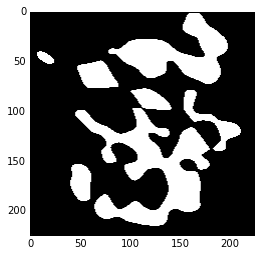

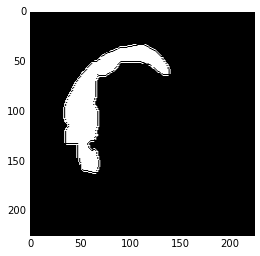

 141/2927 [>.............................] - ETA: 11:29:06 - loss: 4.7191 - acc: 0.7070

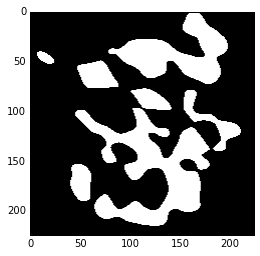

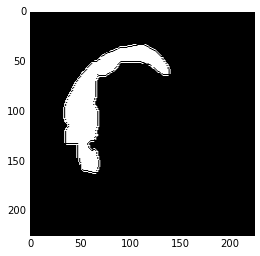

 144/2927 [>.............................] - ETA: 11:28:15 - loss: 4.7075 - acc: 0.7077

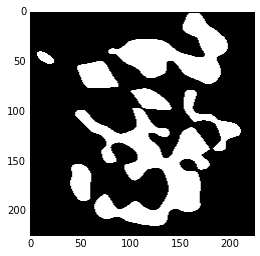

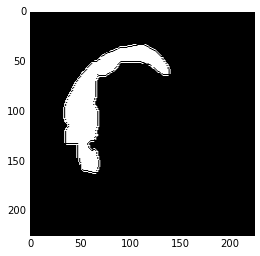

 147/2927 [>.............................] - ETA: 11:27:40 - loss: 4.6937 - acc: 0.7085

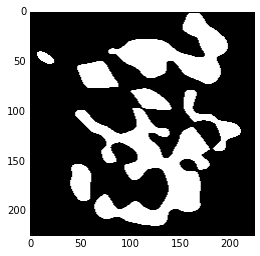

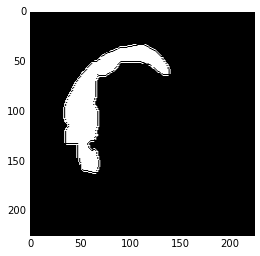

 150/2927 [>.............................] - ETA: 11:26:50 - loss: 4.6791 - acc: 0.7094

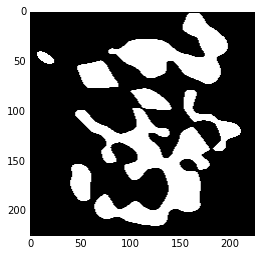

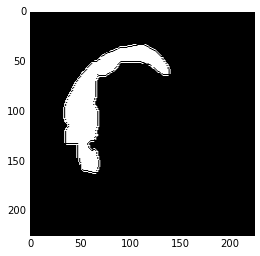

 153/2927 [>.............................] - ETA: 11:26:08 - loss: 4.6733 - acc: 0.7098

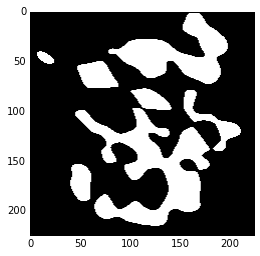

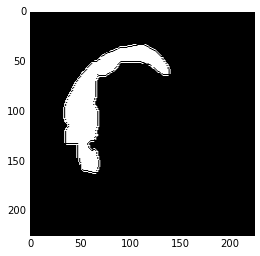

 156/2927 [>.............................] - ETA: 11:25:23 - loss: 4.6726 - acc: 0.7099

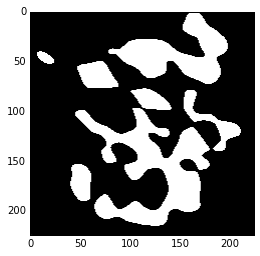

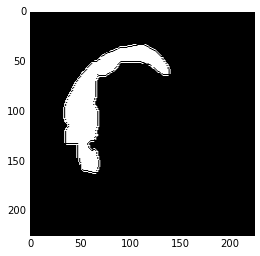

 159/2927 [>.............................] - ETA: 11:24:36 - loss: 4.6656 - acc: 0.7103

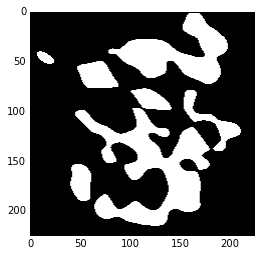

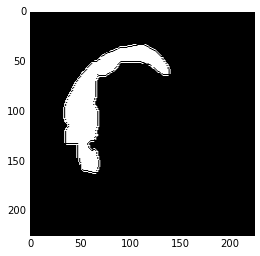

 162/2927 [>.............................] - ETA: 11:23:46 - loss: 4.6564 - acc: 0.7109

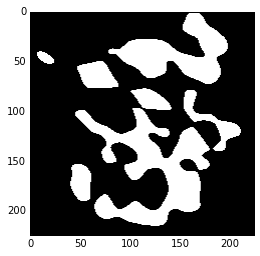

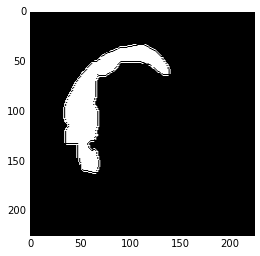

 165/2927 [>.............................] - ETA: 11:22:56 - loss: 4.6567 - acc: 0.7109

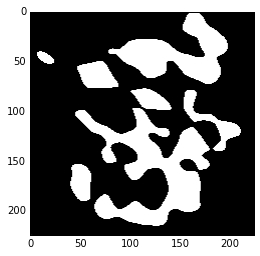

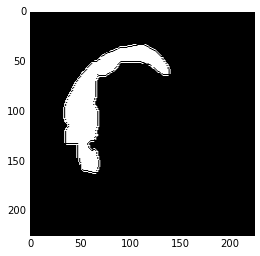

 168/2927 [>.............................] - ETA: 11:22:07 - loss: 4.6474 - acc: 0.7114

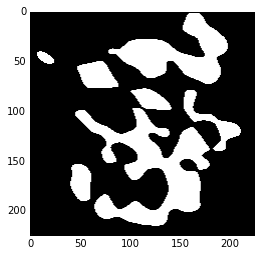

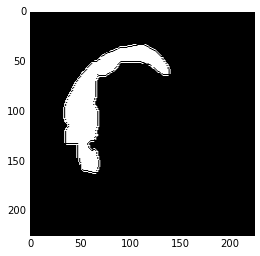

 171/2927 [>.............................] - ETA: 11:21:19 - loss: 4.6405 - acc: 0.7119

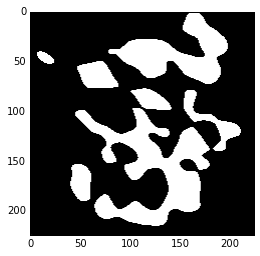

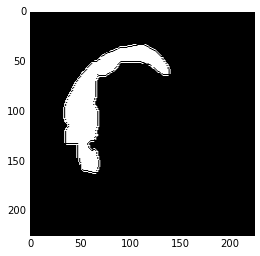

 174/2927 [>.............................] - ETA: 11:20:28 - loss: 4.6379 - acc: 0.7120

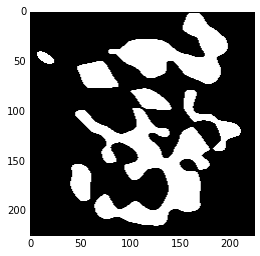

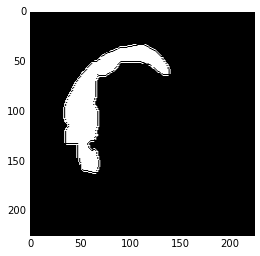

 177/2927 [>.............................] - ETA: 11:19:39 - loss: 4.6288 - acc: 0.7126

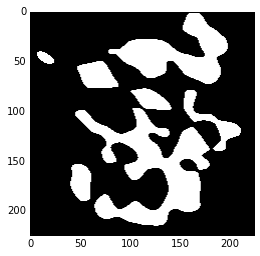

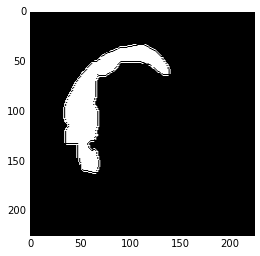

 180/2927 [>.............................] - ETA: 11:18:50 - loss: 4.6191 - acc: 0.7132

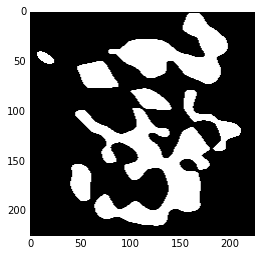

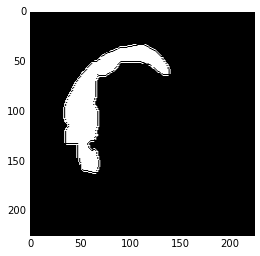

 183/2927 [>.............................] - ETA: 11:18:02 - loss: 4.6151 - acc: 0.7135

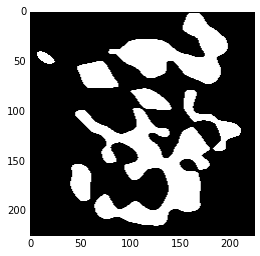

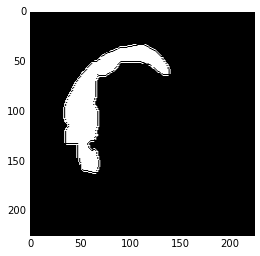

 186/2927 [>.............................] - ETA: 11:17:16 - loss: 4.6073 - acc: 0.7140

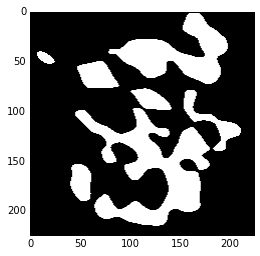

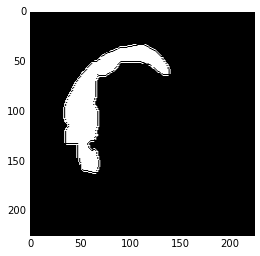

 189/2927 [>.............................] - ETA: 11:16:27 - loss: 4.6039 - acc: 0.7142

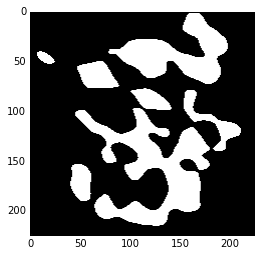

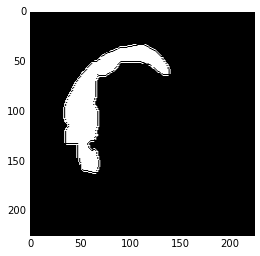

 192/2927 [>.............................] - ETA: 11:15:42 - loss: 4.5986 - acc: 0.7145

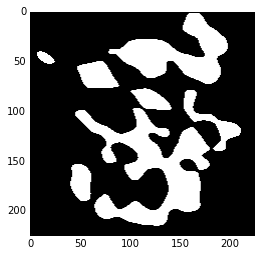

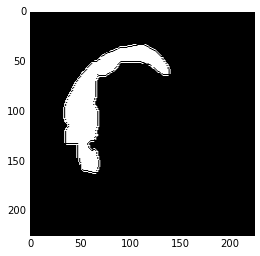

 195/2927 [>.............................] - ETA: 11:14:55 - loss: 4.5929 - acc: 0.7149

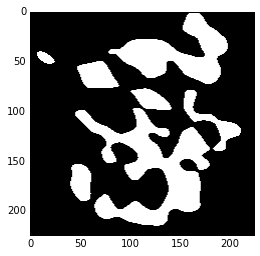

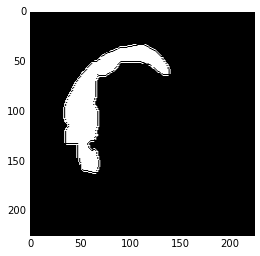

 198/2927 [=>............................] - ETA: 11:14:06 - loss: 4.6031 - acc: 0.7142

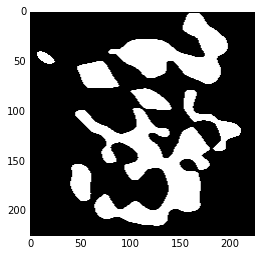

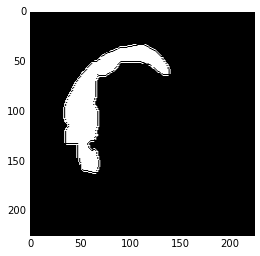

 201/2927 [=>............................] - ETA: 11:13:19 - loss: 4.5939 - acc: 0.7148

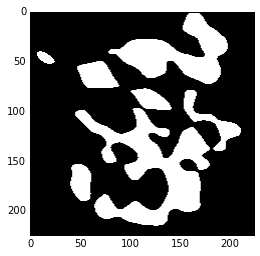

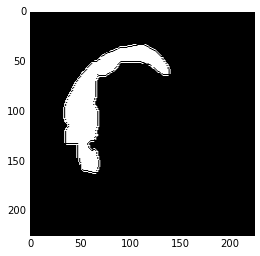

 204/2927 [=>............................] - ETA: 11:12:35 - loss: 4.5914 - acc: 0.7150

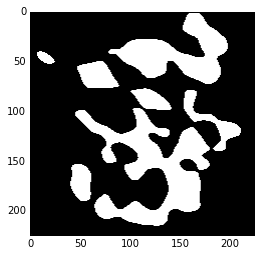

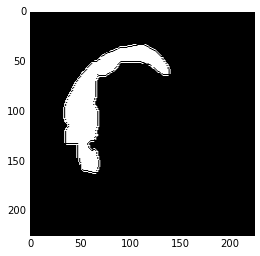

 207/2927 [=>............................] - ETA: 11:11:49 - loss: 4.5982 - acc: 0.7145

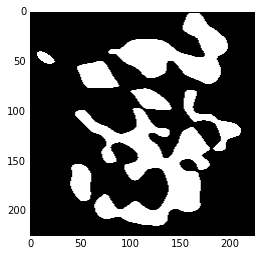

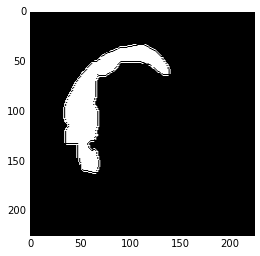

 210/2927 [=>............................] - ETA: 11:11:39 - loss: 4.5915 - acc: 0.7150

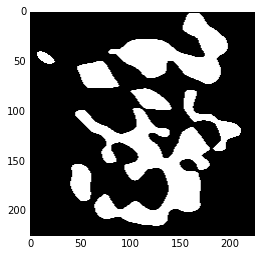

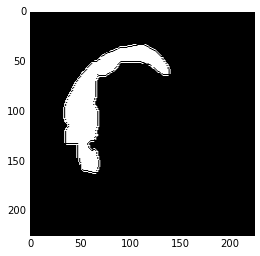

 213/2927 [=>............................] - ETA: 11:10:52 - loss: 4.5908 - acc: 0.7150

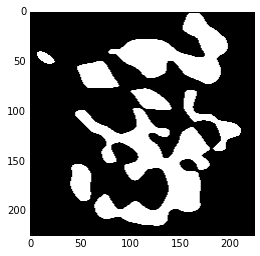

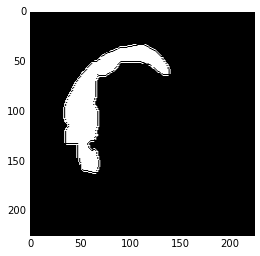

 216/2927 [=>............................] - ETA: 11:10:00 - loss: 4.5844 - acc: 0.7154

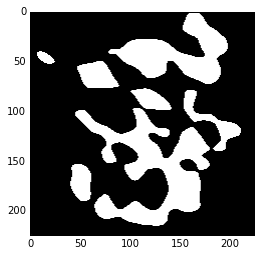

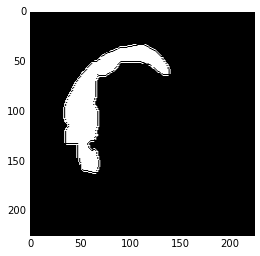

 219/2927 [=>............................] - ETA: 11:09:33 - loss: 4.5816 - acc: 0.7156

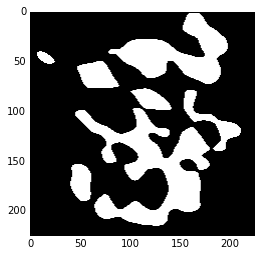

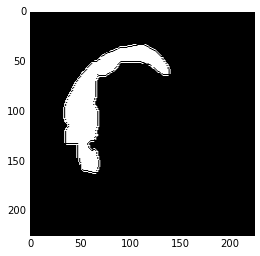

 222/2927 [=>............................] - ETA: 11:08:41 - loss: 4.5804 - acc: 0.7157

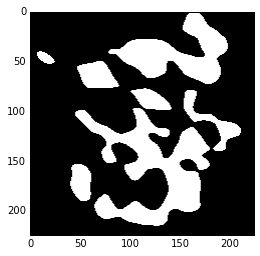

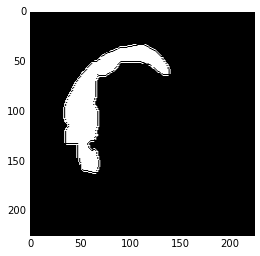

 225/2927 [=>............................] - ETA: 11:07:51 - loss: 4.5750 - acc: 0.7160

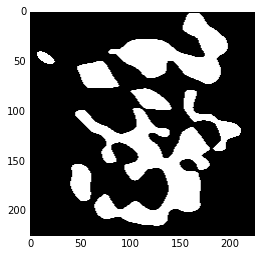

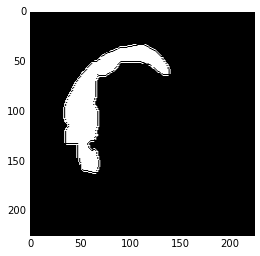

 228/2927 [=>............................] - ETA: 11:07:01 - loss: 4.5686 - acc: 0.7164

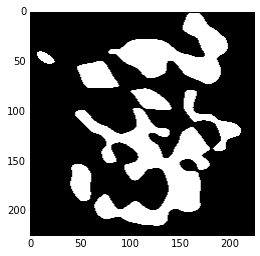

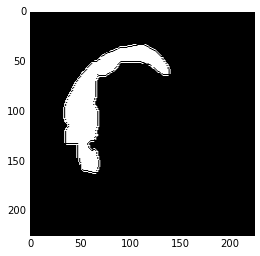

 231/2927 [=>............................] - ETA: 11:06:16 - loss: 4.5675 - acc: 0.7165

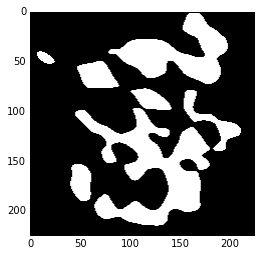

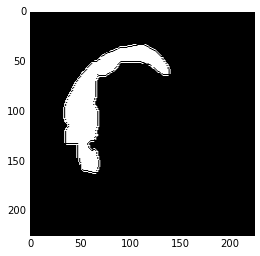

 234/2927 [=>............................] - ETA: 11:05:24 - loss: 4.5757 - acc: 0.7160

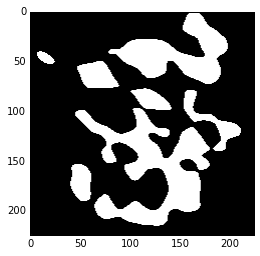

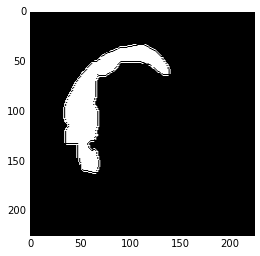

 237/2927 [=>............................] - ETA: 11:04:36 - loss: 4.5721 - acc: 0.7162

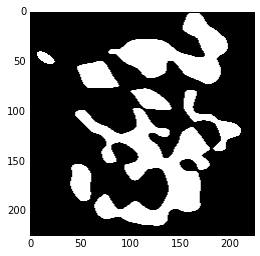

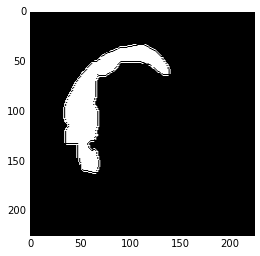

 240/2927 [=>............................] - ETA: 11:03:44 - loss: 4.5698 - acc: 0.7163

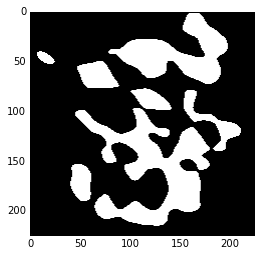

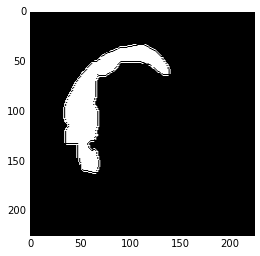

In [ ]:
#compile the model
mobile_head_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mobile_head_model.fit(np.array(x).reshape(-1, 224, 224, 3), np.array(y).reshape(-1, 224 * 224, 2), batch_size = 3, epochs=5, callbacks = [draw_callback])

In [ ]:
print(mobile_head_model.predict(np.array(x[0]).reshape(-1, 224, 224, 3)).shape)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
this_x = mobile_head_model.predict(np.array(x[1]).reshape(-1, 224, 224, 3)).reshape(224 * 224 * 1).reshape(224, 224)
plt.imshow(this_x, cmap='gray')
plt.show()
plt.imshow(np.array(y[1]).reshape(224, 224), cmap='gray')
plt.show()